# 08.02.20

**Author:** Miron Rogovets

---

### Task 1. Chi-square test. Use data_games.dta file.

**1.1.** Analyze the relationship between **payment_type** and **payment_method** using Chi-square statistical test. Is the Chi-square test applicable for this pair of variables? If yes, formulate hypotheses, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between these two variables.

**1.2.** Analyze the relationship between **payment_type** and **crystalls_balance_before_buy** using Chi-square statistical test. Is the Chi-square test applicable for this pair of variables? If yes, formulate hypotheses, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between these two variables.

---

### Task 2. Scatterplot. Normality test. Correlation. Use data_games.dta file.

**2.1.** Create a scatterplot between **crystalls_balance_before_buy** and **payment**. Copy the scatterplot into this file.

Populating the interactive namespace from numpy and matplotlib


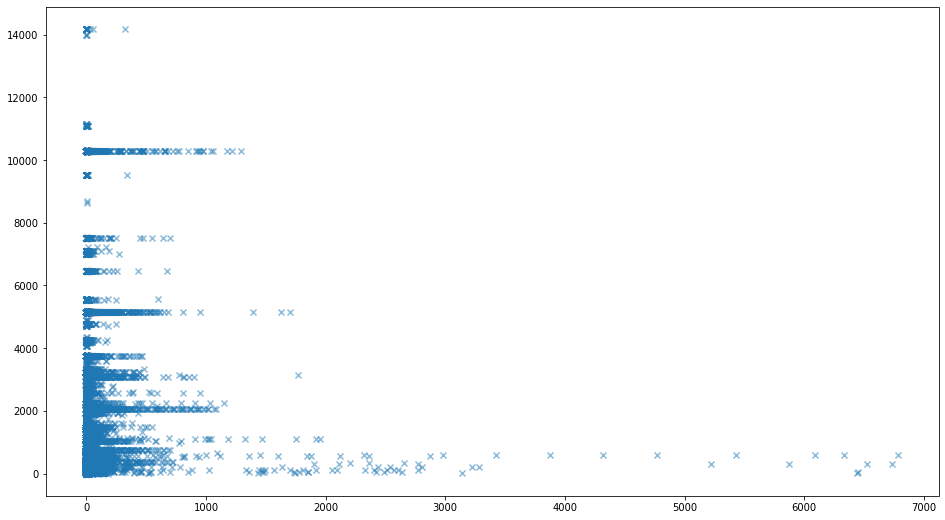

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("data/data_games.dta")

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 9)

plt.scatter(data.crystalls_balance_before_buy, data.payment, marker = "x", alpha = 0.5)
plt.show()

**2.2.** Run the suitable normality test to conclude whether the distribution of **payment** variable is significantly different from the normal. Formulate hypothesis. Make conclusions.

In [6]:
print(len(data.payment))

105507


The sample's size is much greater than 100.
Since, Shapiro-Wilks test is not suitable for current test. 

We are to use **Kolmogorov-Smirnov normality test**

H0: Distribution of variable `payment` is not significantly different from normal distribution.

H1: Distribution of variable `payment` is significantly different from normal distribution.

In [9]:
from scipy.stats import kstest

print("p-value of Kolmogorov-Smirnov normality test equals = {}".format(kstest(data.payment, 'norm').pvalue))

p-value of Kolmogorov-Smirnov normality test equals = 0.0


As p-value = 0.0 we reject the null hypothesis and conclude that values of `payment` variable do not follow the normal distribution.

Calculate an appropriate correlation coefficient between three pairs of variables. Fill in the table below. Interpret the results.


| Variables | Type of the appropriate correlation coefficient | Hypotheses | Strength of the relationship | Direction of the relationship | Significance of the relationship |
|:---|:---:|:---:|:---:|:---:|:---:|
| crystalls_balance_before_buy and payment |   |   |   |   |   |
| crystalls_balance_before_buy and crystalls_bought |   |   |   |   |   |
| crystalls_bought and payment |   |   |   |   |   |

---

### Task 3. Partial correlation. Use health_funding.dta file.

Calculate paired correlation coefficient between **funding** and **disease** variables. Now calculate the correlation coefficient between the same pair of variables controlling for the number of visits (**visits** variable). Interpret the results of analysis.

---

### Task 4. T-tests and Nonparametric tests.

**4.1.** Use **auto.dta** file (example datasets). Select an appropriate test to check if there is a difference in the mean length of foreign and non-foreign cars. Explain you selection. Formulate the hypotheses. Interpret the results of analysis. 

**4.2.** Use **data_games.dta** file. Select an appropriate test to understand whether there is a difference in payments between the people who have used different payment types. Explain you selection. Formulate the hypotheses. Interpret the results of analysis. 

**4.3.** Use **data_games.dta** file. Select an appropriate test to understand whether there is a difference in payments between the people who have used different payment methods. Explain you selection. Formulate the hypotheses. Interpret the results of analysis.